In [1]:
# import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('parkinsons.data')  # Replace 'your_dataset.csv' with the actual file name

In [3]:
# Separate features (X) and target (y)
X = data.drop(['name', 'status'], axis=1)  # Remove 'name' column and keep all features except 'status'
y = data['status']  # Target variable

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create and train the Logistic Regression model
# Used solver: lbfgs
# This solver is better for multiclass classification and large dataset because of memory optimization

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [7]:
# Model intercept_
model.intercept_

array([2.39361358])

In [8]:
# Model coef_
model.coef_

array([[-0.44753985, -0.3639079 , -0.1315279 , -0.41230642, -0.5804486 ,
         0.54268417,  0.06404061,  0.54153306,  0.15649019,  0.11778959,
        -0.31576075,  0.38879694,  0.64159721, -0.31682881, -0.18778479,
         0.06709004, -0.45326709,  0.10507273,  0.82783413,  0.44261772,
         0.8433465 ,  1.14353871]])

In [9]:
N = len(data.keys())
print(N)
print(list(data.keys()))

24
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


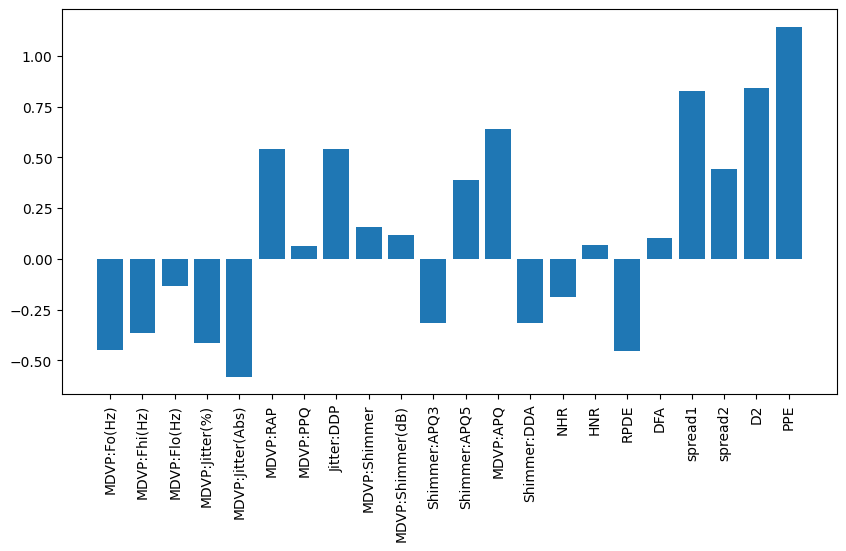

In [10]:
# Interpretation of intercept and coef values
N = len(list(X.keys()))
values = model.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(np.arange(0, N), values)
plt.xticks(np.arange(0, N), list(X.keys()), rotation='vertical')

plt.show()

In [11]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [12]:
# Evaluate the model
accuracy_lbfgs = accuracy_score(y_test, y_pred)
precision_score_lbfgs = precision_score(y_test, y_pred)
recall_score_lbfgs = recall_score(y_test, y_pred)
f1_score_lbfgs = f1_score(y_test, y_pred)
conf_matrix_lbfgs = confusion_matrix(y_test, y_pred)
class_report_lbfgs = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_lbfgs:.2f}")
print(f"Precision score: {precision_score_lbfgs:.2f}")
print(f"Recall score: {recall_score_lbfgs:.2f}")
print(f"F1 score: {f1_score_lbfgs:.2f}")
print("Confusion Matrix:\n", conf_matrix_lbfgs)
print("Classification Report:\n", class_report_lbfgs)


Accuracy: 0.90
Precision score: 0.89
Recall score: 1.00
F1 score: 0.94
Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [13]:
# 'liblinear'good for very binary classification and high-dimensional datasets with a small number of samples. 

model_liblinear = LogisticRegression(solver='liblinear')
model_liblinear.fit(X_train_scaled, y_train)




LogisticRegression(solver='liblinear')

In [14]:
# Model intercept_
model_liblinear.intercept_

array([1.96426723])

In [15]:
# Model coef_
model_liblinear.coef_

array([[-0.46204014, -0.34035035, -0.20497493, -0.48859891, -0.61024293,
         0.49744217, -0.07324702,  0.4962776 ,  0.14548998,  0.09413161,
        -0.27227385,  0.29849665,  0.53320938, -0.27334847, -0.263167  ,
        -0.03871869, -0.42525738,  0.12262618,  0.78258976,  0.39811348,
         0.79683074,  1.00731256]])

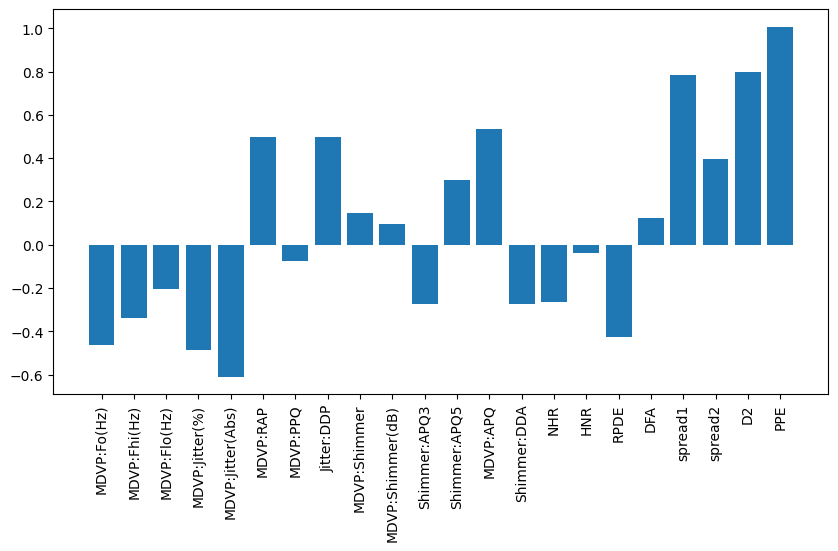

In [16]:
# Interpretation of intercept and coef values for liblinear solver
N = len(list(X.keys()))
values = model_liblinear.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(np.arange(0, N), values)
plt.xticks(np.arange(0, N), list(X.keys()), rotation='vertical')

plt.show()

In [17]:
# Predict on the test set
y_pred = model_liblinear.predict(X_test_scaled)

In [18]:
# Evaluate the model for liblinear solver
accuracy_liblinear = accuracy_score(y_test, y_pred)
precision_score_liblinear = precision_score(y_test, y_pred)
recall_score_liblinear = recall_score(y_test, y_pred)
f1_score_liblinear = f1_score(y_test, y_pred)
conf_matrix_liblinear = confusion_matrix(y_test, y_pred)
class_report_liblinear = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_liblinear:.2f}")
print(f"Precision score: {precision_score_liblinear:.2f}")
print(f"Recall score: {recall_score_liblinear:.2f}")
print(f"F1 score: {f1_score_liblinear:.2f}")
print("Confusion Matrix:\n", conf_matrix_liblinear)
print("Classification Report:\n", class_report_liblinear)


Accuracy: 0.92
Precision score: 0.91
Recall score: 1.00
F1 score: 0.96
Confusion Matrix:
 [[ 4  3]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39

